Homework1
Name: Jingyue Zhang
Student ID:7529916982
Github username：jingyuezzz

In [354]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


(a)load data

In [355]:
data = arff.loadarff('data/vertebral_column_data/column_2C_weka.arff')
data_df = pd.DataFrame(data[0])

In [356]:
#Transfer class to 0/1
classnew = []
for x in data_df['class']:
    if x == b'Normal':
        classnew.append(0)
    else:
        classnew.append(1)
data_df['new_class'] = classnew


(b)i. scatterplots of the independent variables

Text(0.5, 1.05, 'scatterplots of independent variables')

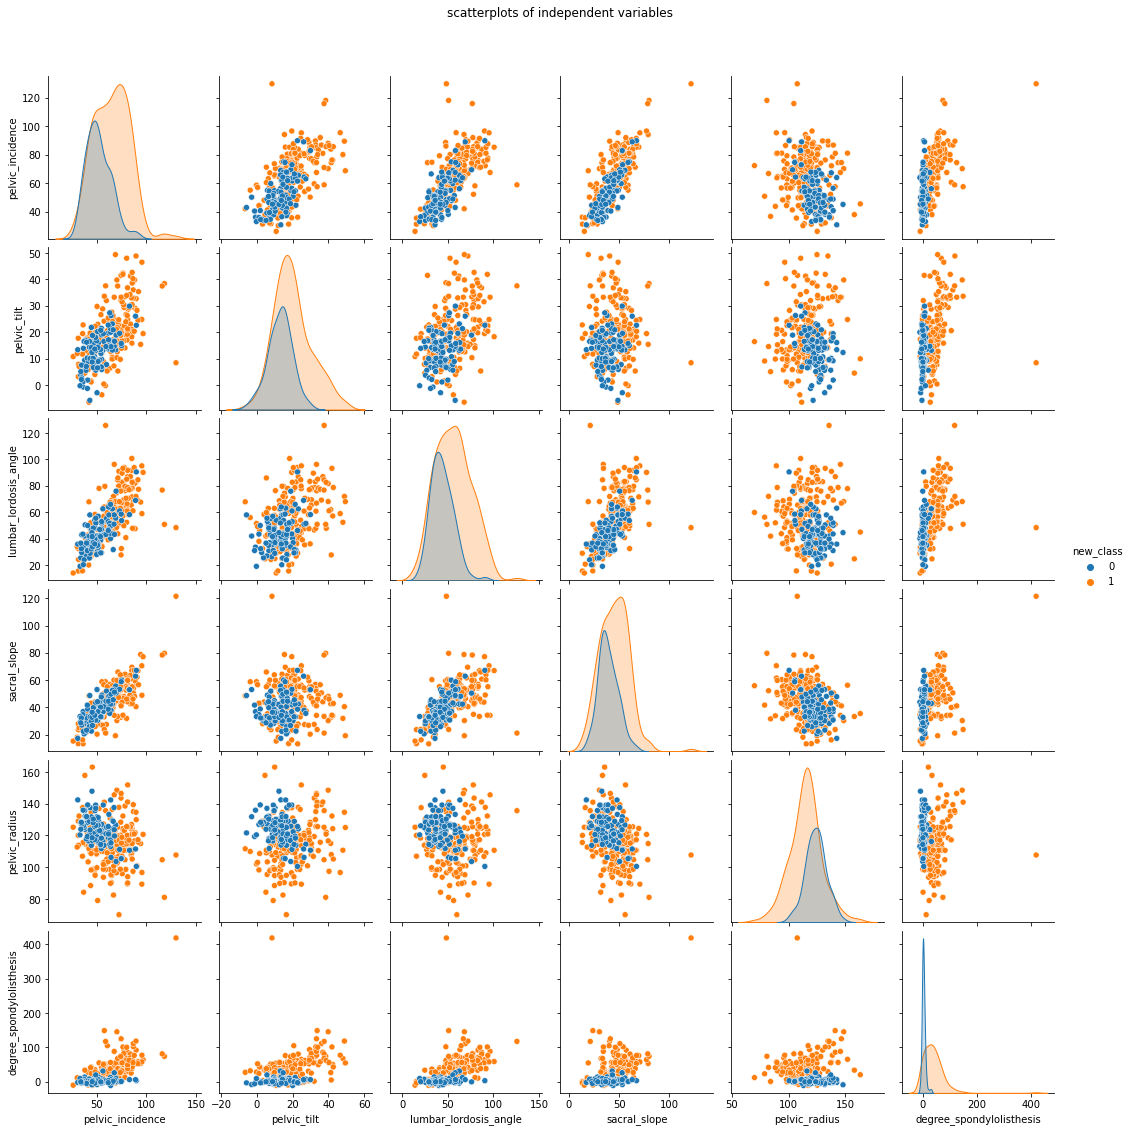

In [357]:
seaborn.pairplot(data_df,hue = "new_class")
plt.show
plt.suptitle('scatterplots of independent variables',y=1.05) 

(b)ii. boxplots for each of the independent variables.

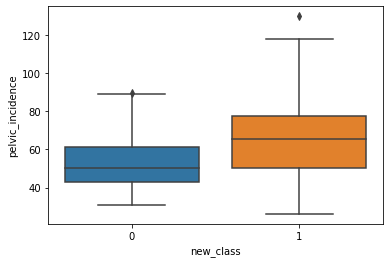

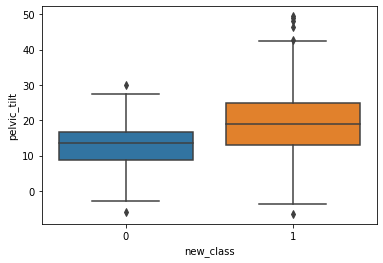

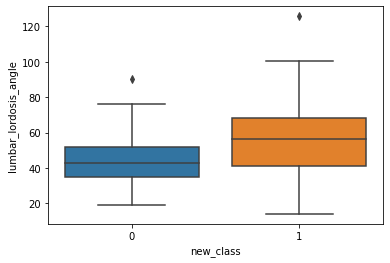

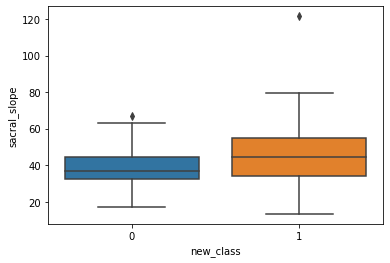

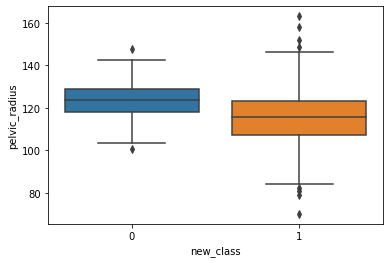

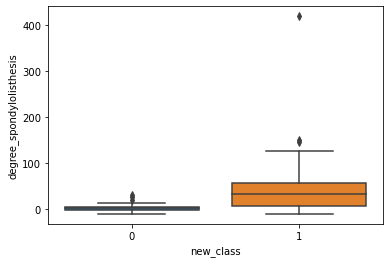

In [358]:
seaborn.boxplot(data = data_df,x = "new_class",y = "pelvic_incidence" )
plt.show()
seaborn.boxplot(data = data_df,x = "new_class",y = "pelvic_tilt" )
plt.show()
seaborn.boxplot(data = data_df,x = "new_class",y = "lumbar_lordosis_angle" )
plt.show()
seaborn.boxplot(data = data_df,x = "new_class",y = "sacral_slope" )
plt.show()
seaborn.boxplot(data = data_df,x = "new_class",y = "pelvic_radius" )
plt.show()
seaborn.boxplot(data = data_df,x = "new_class",y = "degree_spondylolisthesis" )
plt.show()


(b)iii.split training set and testing set

In [359]:
trainset = data_df[data_df['new_class']==1][0:140]
trainset = trainset.append(data_df[data_df['new_class']==0][0:70])
testset = data_df[data_df['new_class']==0][70:]
testset = testset.append(data_df[data_df['new_class']==1][140:])




(c)i.

In [360]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [361]:
x_train = trainset[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]
y_train = trainset['new_class']
x_test = testset[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]
y_test = testset['new_class']


(c)ii.

In [362]:
train_err = []
test_err = []
k_range = range(208,1,-2)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train,y_train)
    predicted_train_y = knn.predict(x_train)
    predicted_test_y = knn.predict(x_test)
    acc_train = accuracy_score(y_train, predicted_train_y)
    acc_test = accuracy_score(y_test, predicted_test_y)
    train_err.append(1-acc_train)
    test_err.append(1-acc_test)
min_err_eu = min(test_err)
k_optimal = k_range[test_err.index(min_err_eu)]

Plot the test error and train error

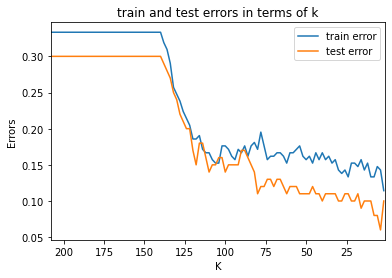

In [363]:
plt.xlim([208, 1])
plt.plot(k_range, train_err, label='train error')
plt.plot(k_range, test_err, label='test error')
plt.legend()
plt.xlabel('K')
plt.ylabel('Errors')
plt.title('train and test errors in terms of k')
plt.show()

Optimal k is 4.Then calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k=4

In [364]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(x_train,y_train)
predicted_test_y = knn.predict(x_test)
cm= confusion_matrix(y_test, predicted_test_y)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
TP_rate = TP/(TP+FN)
TN_rate = TN/(TN+FP)
precision = TP/(TP+FP)
F1_score = f1_score(y_test, predicted_test_y)

print('Confusion_matrix:')
print(cm)
print("True positive rate:")
print(TP_rate)
print("True negative rate:")
print(TN_rate)
print("Precision:")
print(precision)
print("F1 score:")
print(F1_score)

Confusion_matrix:
[[25  5]
 [ 1 69]]
True positive rate:
0.9857142857142858
True negative rate:
0.8333333333333334
Precision:
0.9324324324324325
F1 score:
0.9583333333333333


(c)iii.

Text(0, 0.5, 'Min test error')

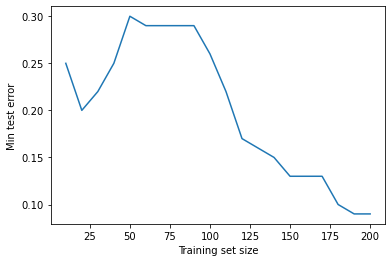

In [365]:
N_range = range(10,208,10)
test_errors = []

for N in N_range:
    test_errs = []
    for k in range(1,N,5):
        trainset1 = data_df[data_df['new_class']==1][0:(N-N//3)]
        trainset1 = trainset1.append(data_df[data_df['new_class']==0][0:N//3])
        x_train1 = trainset1[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]
        y_train1 = trainset1['new_class']
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(x_train1,y_train1)
        predicted_test_y = knn.predict(x_test)
        acc_test = accuracy_score(y_test, predicted_test_y)
        test_err_score = []
        test_err_score.append(1-acc_test)
        test_errs.append(min(test_err_score))
    test_errors.append(min(test_errs))
    
plt.plot(N_range, test_errors)
plt.xlabel('Training set size')
plt.ylabel('Min test error')


(d)i.A

In [366]:
k_range = range(1,196,5)
test_err=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski')
    knn.fit(x_train,y_train)
    predicted_test_y = knn.predict(x_test)
    acc_test = accuracy_score(y_test, predicted_test_y)
    test_err.append(1-acc_test)
min_err_ma = min(test_err)
k_optimal_list = []
i = 1
for m in test_err:
    if m == min_err_ma:
        k_optimal_list.append(i)
    i=i+5

print("test error wirh Manhattan Distance:")
print(min_err_ma)
print('optimal k:')
print(k_optimal_list)


test error wirh Manhattan Distance:
0.10999999999999999
optimal k:
[1, 6, 11, 26]


(d)i.B

The optimal k for the Manhattan distance in (d)ia 1 and we select the next smallest optimal k,k=6.

In [367]:
l_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
test_err=[]

for l in l_list:
    knn = KNeighborsClassifier(n_neighbors=6,p=pow(10,l),metric='minkowski')
    knn.fit(x_train,y_train)
    predicted_test_y = knn.predict(x_test)
    acc_test = accuracy_score(y_test, predicted_test_y)
    test_err.append(1-acc_test)
min_err_mi = min(test_err)
l_optimal = l_list[test_err.index(min_err_mi)]

print("minimun test error:")
print(min_err_mi)
print('optimal lg(p):')
print(l_optimal)

minimun test error:
0.06000000000000005
optimal lg(p):
0.6


(d)i.C

In [368]:
k_range = range(1,196,5)
test_err=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    knn.fit(x_train,y_train)
    predicted_test_y = knn.predict(x_test)
    acc_test = accuracy_score(y_test, predicted_test_y)
    test_err.append(1-acc_test)
min_err_ch = min(test_err)
k_optimal = k_range[test_err.index(min_err_ch)]
print("minimun test error with Chebyshev metric:")
print(min_err_ch)
print('optimal k:')
print(k_optimal)

minimun test error with Chebyshev metric:
0.07999999999999996
optimal k:
16


(d)ii.

In [ ]:
import numpy as np
k_range = range(1,196,5)
test_err=[]
cov_x = np.cov(x_train,rowvar = False)
#incov_x = np.linalg.pinv(cov_x)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'mahalanobis', metric_params={'VI': np.linalg.inv(cov_x)})
    knn.fit(x_train,y_train)
    predicted_test_y = knn.predict(x_test)
    acc_test = accuracy_score(y_test, predicted_test_y)
    test_err.append(1-acc_test)
min_err_mh = min(test_err)
k_optimal = k_range[test_err.index(min_err_mh)]
print("minimun test error with mahalanobis metric:")
print(min_err_mh)
print('optimal k:')
print(k_optimal)

make a table to summarize the results

In [ ]:
all_errs = [min_err_ma,min_err_mi,min_err_ch,min_err_mh]
table = {
    'Metric':['Manhattan','Minkowski','Chebyshev','Mahalanobis'],
    'Best test errors':all_errs
}
pd.DataFrame(table)

(e)

Euclidean:

In [ ]:
train_err = []
test_err = []
k_range = range(1,196,5)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean',weights='distance')
    knn.fit(x_train,y_train)
    predicted_train_y = knn.predict(x_train)
    predicted_test_y = knn.predict(x_test)
    acc_train = accuracy_score(y_train, predicted_train_y)
    acc_test = accuracy_score(y_test, predicted_test_y)
    train_err.append(1-acc_train)
    test_err.append(1-acc_test)
min_err_eud = min(test_err)
k_optimal = k_range[test_err.index(min_err_eud)]

print("minimun test error with euclidean metric,weights = distance:",min_err_eud)
print('optimal k:',k_optimal)

Manhattan:

In [ ]:
k_range = range(1,196,5)
test_err=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski',weights='distance')
    knn.fit(x_train,y_train)
    predicted_test_y = knn.predict(x_test)
    acc_test = accuracy_score(y_test, predicted_test_y)
    test_err.append(1-acc_test)
min_err_mad = min(test_err)
k_optimal_list = []
i = 1
for m in test_err:
    if m == min_err_mad:
        k_optimal_list.append(i)
    i=i+5

print("test error wirh Manhattan Distance,weights = distance:")
print(min_err_mad)
print('optimal k:')
print(k_optimal_list)

Chebyshev

In [ ]:
k_range = range(1,196,5)
test_err=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='chebyshev',weights='distance')
    knn.fit(x_train,y_train)
    predicted_test_y = knn.predict(x_test)
    acc_test = accuracy_score(y_test, predicted_test_y)
    test_err.append(1-acc_test)
min_err_chd = min(test_err)
k_optimal = k_range[test_err.index(min_err_chd)]
print("minimun test error with Chebyshev metric,weights = distance:")
print(min_err_chd)
print('optimal k:')
print(k_optimal)

(F)
The lowest training error rate I get in this homework is 0.